# General Information
Created by :
- Marsoni David
- Zanya Fernandez Rodriguez

Group : DM_ZF

In [1]:
# install required packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install prettytable
%pip install colorama
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required libraries

# General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from colorama import Fore, Style
from scipy.stats import norm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Scikit-learn libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score, 
    classification_report, confusion_matrix, silhouette_score, 
    precision_score, recall_score, f1_score, auc, roc_curve
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [3]:
# Constants for the notebook
RANDOM_STATE = 42 # Random state for reproducibility
TEST_SIZE = 0.3   # Test size for train-test split

# Data understanding
TODO

In [4]:
# load data from csv file
file_name = 'Life_Expectancy_Data.csv'
df = pd.read_csv(file_name)

In [5]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# check for missing values
null_counts = df.isnull().sum()
print("\nNull values in each column:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

# check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Null values in each column:
Country: 0
Year: 0
Status: 0
Life expectancy: 10
Adult Mortality: 10
infant deaths: 0
Alcohol: 194
percentage expenditure: 0
Hepatitis B: 553
Measles: 0
BMI: 34
under-five deaths: 0
Polio: 19
Total expenditure: 226
Diphtheria: 19
HIV/AIDS: 0
GDP: 448
Population: 652
thinness  1-19 years: 34
thinness 5-9 years: 34
Income composition of resources: 167
Schooling: 163

Number of duplicate rows: 0


In [7]:
# Pairplot of the data
#sns.pairplot(df)
#plt.show()

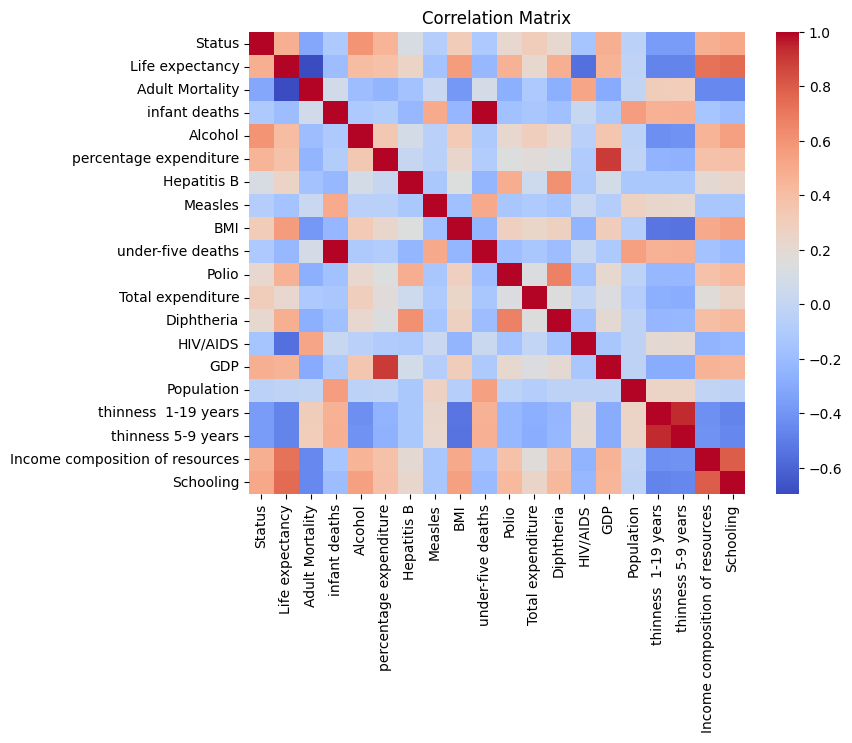

In [26]:
# Store original data
df_original = df.copy()

# Create and display correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Restore original data
df = df_original.copy()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Store original data
df_original = df.copy()

# Convert string values to unique numbers
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])

# Calculate correlation with the target variable
target_column = 'Life expectancy'
correlation_with_target = df.corr()[target_column].sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)


# Restore original data
df = df_original.copy()



Correlation with target variable:
Life expectancy                    1.000000
Income composition of resources    0.862507
Schooling                          0.770425
BMI                                0.567046
Polio                              0.548360
Diphtheria                         0.544518
Status                             0.484603
GDP                                0.463436
Alcohol                            0.407684
percentage expenditure             0.383889
Hepatitis B                        0.369293
Total expenditure                  0.237323
Year                               0.162228
Country                           -0.007229
Population                        -0.023240
Measles                           -0.159015
infant deaths                     -0.199006
under-five deaths                 -0.224680
thinness 5-9 years                -0.475220
thinness  1-19 years              -0.480750
HIV/AIDS                          -0.548693
Adult Mortality                   -0.68540

# Data preprocessing 
TODO

In [ ]:
## remove to high correlated columns with the target column and between them


In [18]:
def handle_missing_values(df):
    # Loop through each column
    for column in df.columns:
        # Check if column has any missing values
        if df[column].isnull().any():
            # For numeric columns, use mean
            if df[column].dtype.kind in 'iufc': # i - integer, u - unsigned integer, f - float, c - complex
                fill_value = df[column].mean()
                df[column] = df[column].fillna(fill_value)
            # For string/object columns, use mode (most frequent)
            else:
                fill_value = df[column].mode()[0]
                df[column] = df[column].fillna(fill_value)
    
    return df

df = handle_missing_values(df)

print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


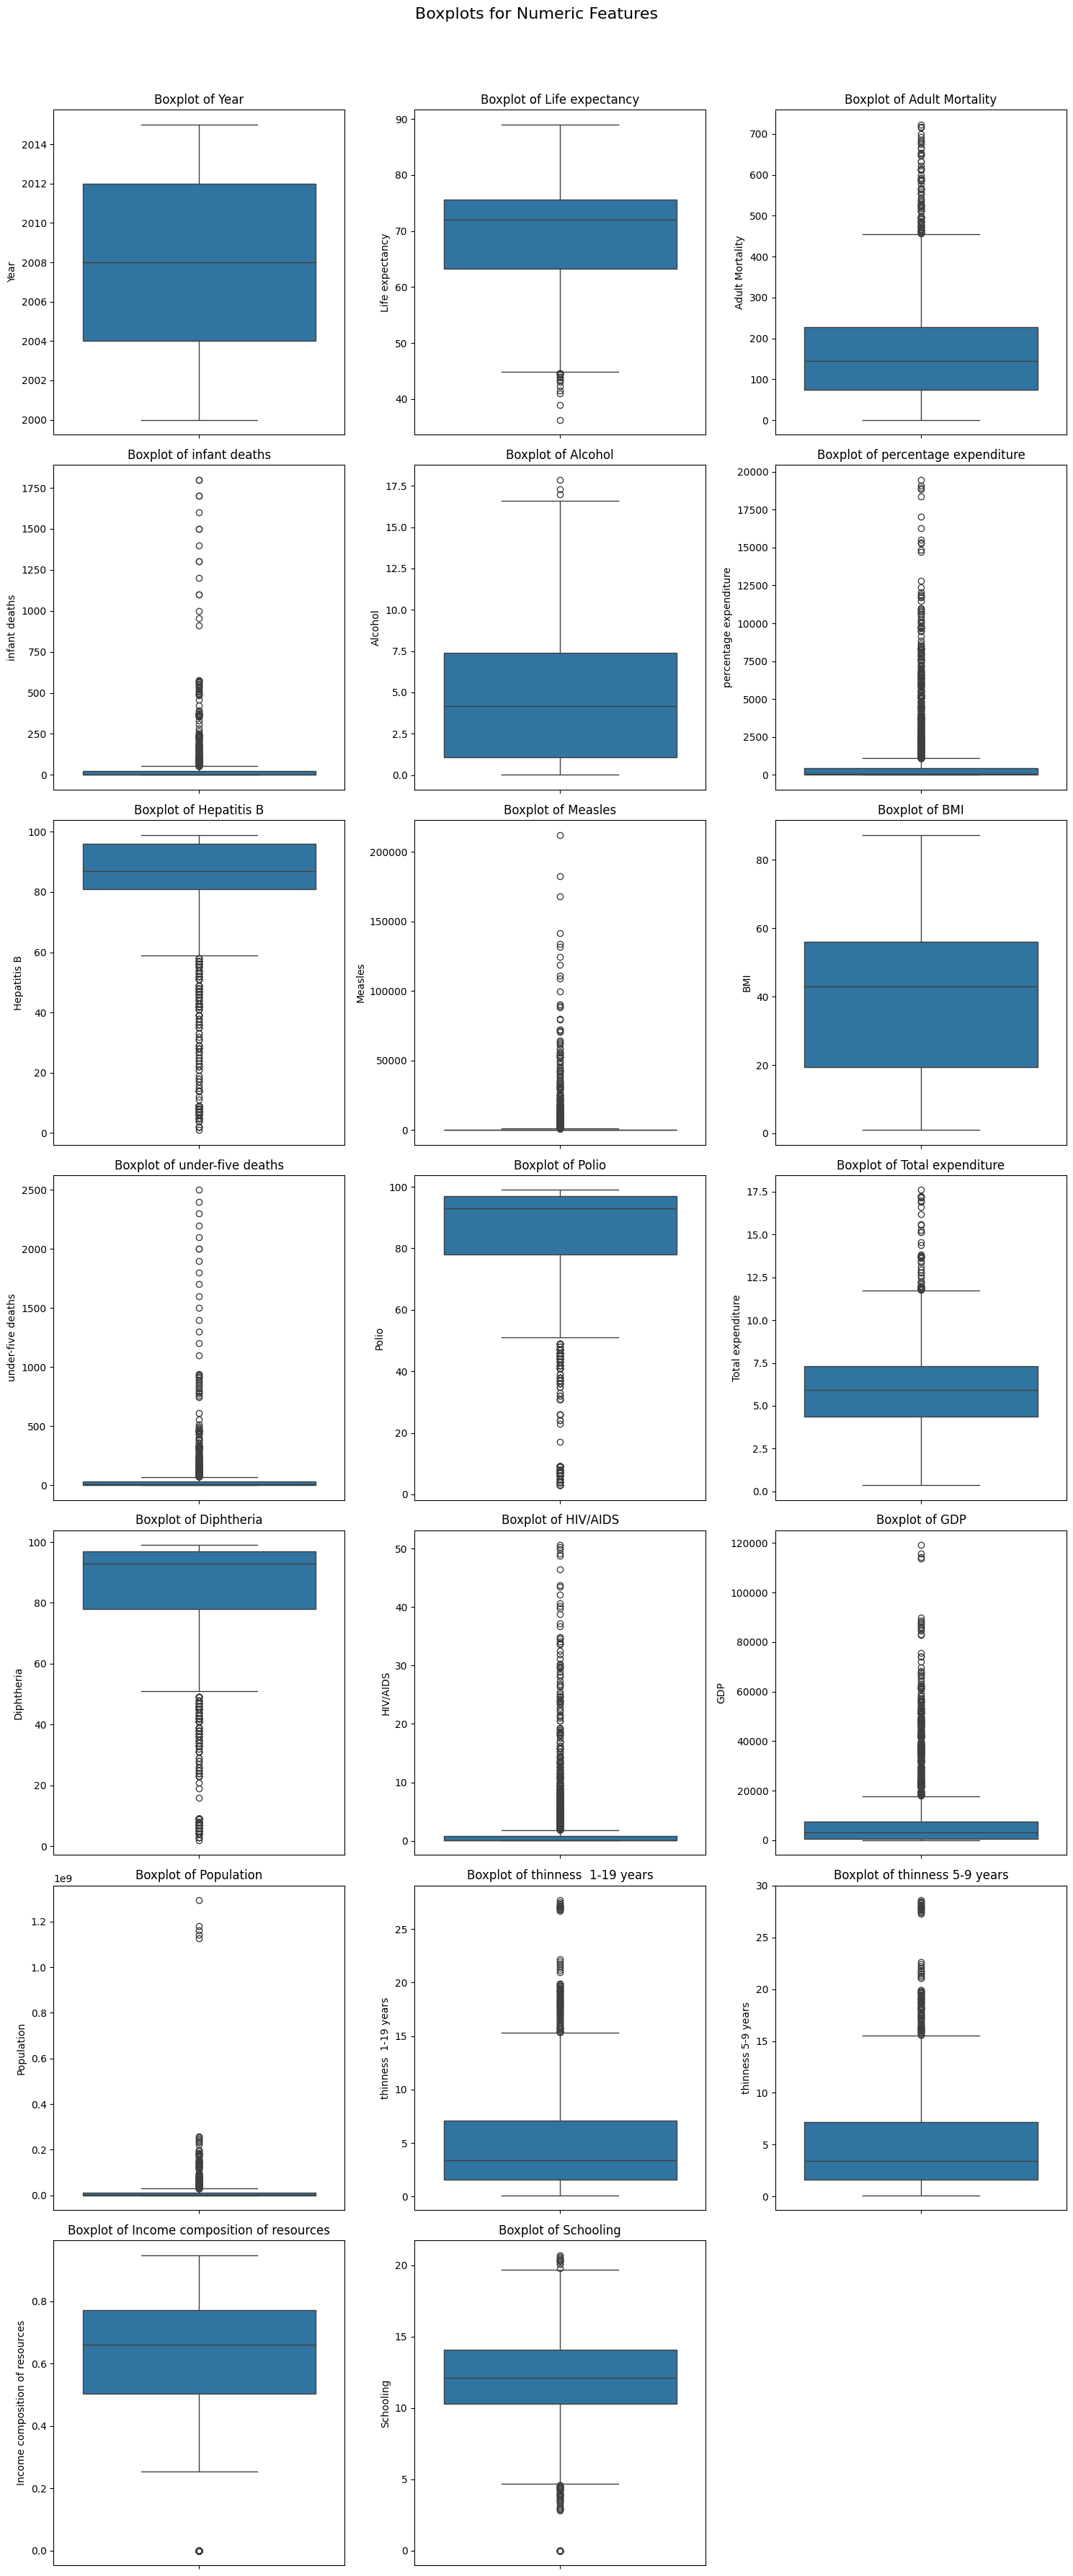


Outliers found:

Life expectancy:
Number of outliers: 17
Outlier values: [36.3 44.5 44.6 44.  43.5 43.1 44.3 43.3 42.3 41.5 41.  39.  44.6 43.8
 44.6 44.3 44.5]

Adult Mortality:
Number of outliers: 86
Outlier values: [491. 566. 652. 693. 699. 679. 647. 466. 472. 473. 473. 467. 461. 477.
 495. 511. 512. 593. 682. 484. 522. 518. 513. 527. 566. 592. 633. 654.
 675. 666. 648. 622. 586. 543. 462. 491. 525. 559. 587. 615. 613. 599.
 588. 477. 483. 471. 463. 464. 496. 513. 519. 533. 473. 486. 496. 498.
 497. 485. 459. 459. 477. 564. 587. 568. 536. 485. 523. 539. 554. 459.
 457. 487. 526. 554. 578. 611. 614. 464. 527. 587. 632. 717. 723. 715.
 686. 665.]

infant deaths:
Number of outliers: 315
Outlier values: [  62   64   66   69   71   74   77   80   82   84   85   87   87   88
   88   88   66   67   69   72   75   78   81   84   87   90   92   94
   95   96   97   97   92   98  104  111  118  126  135  144  154  164
  174  185  196  207  219  231   57   61   65   70   75   81   88   95
  1

In [20]:
def plot_boxplots_and_find_outliers(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    n_cols = 3
    n_rows = (len(numeric_cols) - 1) // n_cols + 1
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Boxplots for Numeric Features', fontsize=16, y=1.02)
    
    axes = axes.flatten()
    outliers_dict = {}
    
    for i, col in enumerate(numeric_cols):
        # Create boxplot
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Store outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        if not outliers.empty:
            outliers_dict[col] = outliers.values
    
    # Remove empty subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Print outliers
    print("\nOutliers found:")
    for col, values in outliers_dict.items():
        print(f"\n{col}:")
        print(f"Number of outliers: {len(values)}")
        print(f"Outlier values: {values}")

# Usage
plot_boxplots_and_find_outliers(df)

In [8]:
# Outliner treatment
def handle_outliers(df):
    # Get numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        # Calculate outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with mean
        df[col] = np.where(df[col] < lower_bound, df[col].mean(), df[col])
    
    return df

df = handle_outliers(df)

In [9]:
## Data Cleaning

## create the target and features
features = df.drop(columns=['Life expectancy'])
target = df['Life expectancy']

# Modelling

## Classification

### Evaluation

## Regression

### Evaluation